In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'/kaggle/input/black-friday-sales-eda/train.csv')

In [5]:
#extracting top 5 data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#extracting randomly 5 rows
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
123059,1001032,P00256642,M,51-55,16,C,0,1,5,NaN,NaN,7075
15040,1002232,P00332242,M,26-35,14,B,1,1,1,16.0,NaN,15778
539730,1005097,P00283942,M,55+,16,C,3,0,5,NaN,NaN,5283
411351,1003363,P00110842,F,36-45,9,B,2,1,1,2.0,5.0,19383
125855,1001409,P00184042,M,18-25,4,B,1,1,1,8.0,NaN,19411


In [7]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
#cheking for the null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
df.shape

(550068, 12)

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [26]:
df.drop(['Product_ID'],inplace=True,axis=1)

In [12]:
#Product_Category_2 
#Product_Category_3  in these 2 columns we have so many null values

In [10]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',' ')
df['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4 
          ..
550063     1
550064     3
550065    4 
550066     2
550067    4 
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [15]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df.duplicated().sum()  #we don't have duplicated values in column Product_Category_2

0

In [23]:
df.rename(columns={'Stay_In_Current_City_Years':'curr_city','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3'},inplace=True)

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,curr_city,Marital_Status,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


# **DATA CLEANING**

In [27]:
#importing statistics model
import statistics

In [35]:
mode1 = statistics.mode(df['product1'])
df['product1'] = df['product1'].fillna(mode1)

In [38]:
mode2 = statistics.mode(df['product2'])
df['product2'] = df['product2'].fillna(mode2)

In [39]:
mode3 = statistics.mode(df['product3'])
df['product3'] = df['product3'].fillna(mode3)

In [40]:
df.sample(5)

,User_ID,Gender,Age,Occupation,City_Category,curr_city,Marital_Status,product1,product2,product3,Purchase
233701,1006037,F,46-50,1,C,4,0,16,8.0,16.0,12380
154483,1005867,F,46-50,3,C,1,1,11,16.0,16.0,2948
10427,1001605,F,18-25,0,B,1,0,5,8.0,16.0,7155
303268,1004675,F,18-25,4,A,2,0,5,11.0,12.0,8805
417279,1004193,M,55+,13,C,1,0,2,8.0,16.0,9652


In [41]:
df.isnull().sum()   #now null values are not present 

User_ID           0
Gender            0
Age               0
Occupation        0
City_Category     0
curr_city         0
Marital_Status    0
product1          0
product2          0
product3          0
Purchase          0
dtype: int64

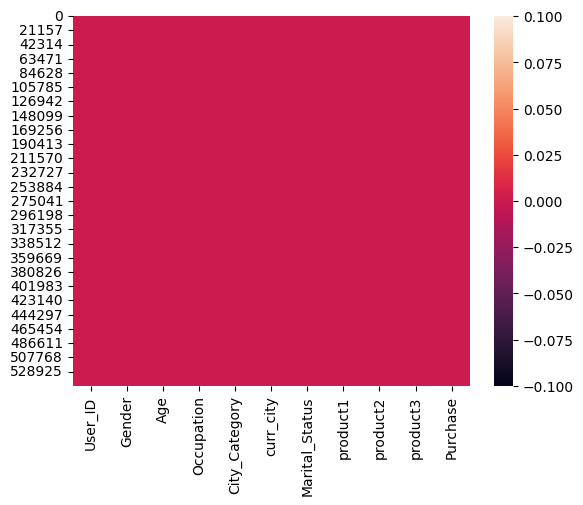

In [44]:
sns.heatmap(df.isnull())   #no null values are their
plt.show()

# **data visualization**

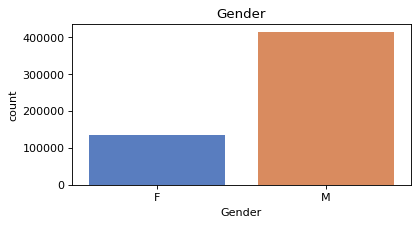

In [48]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=df,palette='muted')
plt.show()

# Gender:The graph showing that males are greater the females

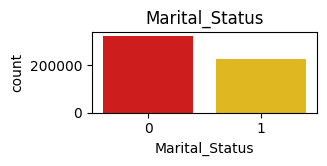

<Axes: title={'center': 'City_Category'}, xlabel='City_Category', ylabel='count'>

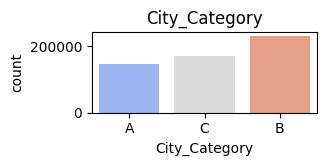

In [67]:
plt.subplot(4,2,1)
plt.title('Marital_Status')
sns.countplot(x='Marital_Status',data=df, palette='hot')
plt.show()

#marital_status: This graph shows single people are more visites to store as compaire to married

plt.subplot(4,2,5)
plt.title('City_Category')
sns.countplot(x='City_Category',data=df,palette='coolwarm')

#City_category: The graph shows that store b has the highest visits of customers and the lowest visits in store a.
#by this we conclued tha we need to give more efforts on store a and c.

,Age
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


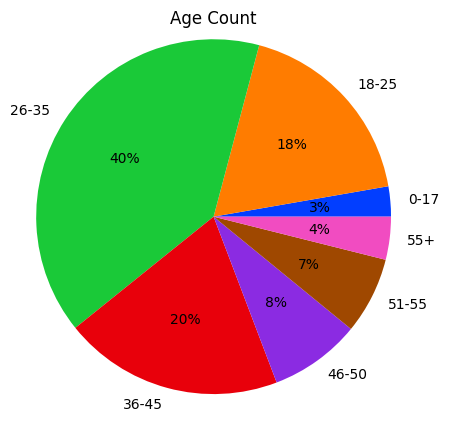

In [68]:
a=df.groupby('Age')['Age'].count()
display(a.to_frame())
plt.title('Age Count')
palette_color=sns.color_palette('bright')
plt.pie(a,colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

# **conclusion**

In given data set, I explored and learned many things like, How to fill NaN values.their i have used the concept of code reusability.
I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted data created new dataframes and got useful data for my research.
for data visualization i have used libraries like seaborn and matplotlib.
i replace null values with mode 
By seeing this EDA we can fulfill this requirement.